## Pregunta 2:
### ¿Se observan diferencias estadísticamente significativas en la edad promedio al momento del divorcio según el nivel de escolaridad de las personas registradas?

IMPORTACIÓN DE LIBRERÍAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import pyclustertend 
import random
from scipy import stats
import seaborn as sns
from scipy.stats import chi2_contingency

CARGA DE ARCHIVOS

In [2]:
df = pd.read_csv('../files/divorcios_limpio1.csv', encoding="latin1")

print(type(df.columns))

print([col for col in df.columns])

<class 'pandas.core.indexes.base.Index'>
['ANO', 'MES', 'DIA', 'DEPTO', 'MUNICIPIO', 'EDAD_HOM', 'EDAD_MUJ', 'ETNIA_HOM', 'ETNIA_MUJ', 'ESCOLARIDAD_HOM', 'ESCOLARIDAD_MUJ', 'OCUPACION_HOM', 'OCUPACION_MUJ', 'MUNICIPIO_NOMBRE', 'DEPTO_NOMBRE', 'ETNIA_HOMBRE_NOMBRE', 'ETNIA_MUJER_NOMBRE', 'ESCOLARIDAD_HOMBRE_NOMBRE', 'ESCOLARIDAD_MUJER_NOMBRE']


/var/folders/dc/_dt3fhrs48n2b_4mmncch3440000gp/T/ipykernel_22757/1693422332.py:1: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../files/divorcios_limpio1.csv', encoding="latin1")


EDAD PROMEDIO POR ESCOLARIDAD - HOMBRES

In [4]:
edad_prom_hom = df.groupby("ESCOLARIDAD_HOMBRE_NOMBRE")["EDAD_HOM"].mean()
print(edad_prom_hom)

ESCOLARIDAD_HOMBRE_NOMBRE
BÃ¡sico             33.061856
Diversificado       33.971362
Preprimaria         39.189041
Primaria            37.252001
Primaria adultos    39.220766
Name: EDAD_HOM, dtype: float64


GRÁFICA DE EDAD PROMEDIO POR ESCOLARIDAD - HOMBRES

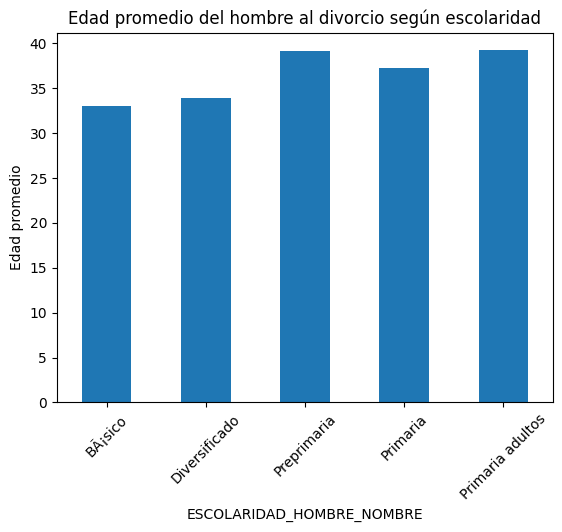

In [6]:
edad_prom_hom.plot(kind="bar")
plt.title("Edad promedio del hombre al divorcio según escolaridad")
plt.ylabel("Edad promedio")
plt.xticks(rotation=45)
plt.show()

EDAD PROMEDIO POR ESCOLARIDAD - MUJERES

In [5]:
edad_prom_muj = df.groupby("ESCOLARIDAD_MUJER_NOMBRE")["EDAD_MUJ"].mean()
print(edad_prom_muj)

ESCOLARIDAD_MUJER_NOMBRE
BÃ¡sico             29.282318
Diversificado       31.757287
Preprimaria         35.258506
Primaria            33.377854
Primaria adultos    35.802942
Name: EDAD_MUJ, dtype: float64


GRÁFICA DE EDAD PROMEDIO POR ESCOLARIDAD - MUJERES

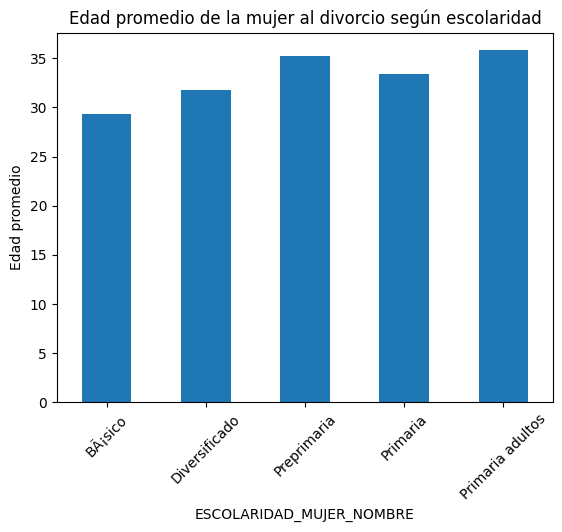

In [7]:
edad_prom_muj.plot(kind="bar")
plt.title("Edad promedio de la mujer al divorcio según escolaridad")
plt.ylabel("Edad promedio")
plt.xticks(rotation=45)
plt.show()

KRUSKAL Y TAMAÑO DEL EFECTO HOMBRES

In [14]:
from scipy.stats import kruskal

df_hom = df.dropna(subset=["EDAD_HOM", "ESCOLARIDAD_HOMBRE_NOMBRE"])

grupos_hom = [
    grupo["EDAD_HOM"].values
    for name, grupo in df_hom.groupby("ESCOLARIDAD_HOMBRE_NOMBRE")
]

H_hom, p_hom = kruskal(*grupos_hom)

k_hom = df_hom["ESCOLARIDAD_HOMBRE_NOMBRE"].nunique()
n_hom = len(df_hom)

eta2_hom = (H_hom - k_hom + 1) / (n_hom - k_hom)

print("H:", H_hom)
print("p-valor:", p_hom)
print("n:", n_hom)
print("k:", k_hom)
print("Eta cuadrado:", eta2_hom)


H: 2134.792920513877
p-valor: 0.0
n: 33579
k: 5
Eta cuadrado: 0.06346556622725553


KRUSKAL Y TAMAÑO DEL EFECTO MUJERES

In [15]:
df_muj = df.dropna(subset=["EDAD_MUJ", "ESCOLARIDAD_MUJER_NOMBRE"])

grupos_muj = [
    grupo["EDAD_MUJ"].values
    for name, grupo in df_muj.groupby("ESCOLARIDAD_MUJER_NOMBRE")
]

H_muj, p_muj = kruskal(*grupos_muj)

k_muj = df_muj["ESCOLARIDAD_MUJER_NOMBRE"].nunique()
n_muj = len(df_muj)

eta2_muj = (H_muj - k_muj + 1) / (n_muj - k_muj)

print("H:", H_muj)
print("p-valor:", p_muj)
print("n:", n_muj)
print("k:", k_muj)
print("Eta cuadrado:", eta2_muj)


H: 2121.6489947112373
p-valor: 0.0
n: 34003
k: 5
Eta cuadrado: 0.062287457930208755


CÁLCULO DE MEDIANAS

In [16]:
medianas_muj = df_muj.groupby("ESCOLARIDAD_MUJER_NOMBRE")["EDAD_MUJ"].median()
medianas_hom = df_hom.groupby("ESCOLARIDAD_HOMBRE_NOMBRE")["EDAD_HOM"].median()

print("Mujeres:\n", medianas_muj)
print("\nHombres:\n", medianas_hom)

Mujeres:
 ESCOLARIDAD_MUJER_NOMBRE
BÃ¡sico             27.0
Diversificado       30.0
Preprimaria         34.0
Primaria            31.0
Primaria adultos    35.0
Name: EDAD_MUJ, dtype: float64

Hombres:
 ESCOLARIDAD_HOMBRE_NOMBRE
BÃ¡sico             31.0
Diversificado       32.0
Preprimaria         37.0
Primaria            35.0
Primaria adultos    37.0
Name: EDAD_HOM, dtype: float64


GRÁFICO DE COMPARACIÓN DE LAS MEDIANAS

                  Mujeres  Hombres
BÃ¡sico              27.0     31.0
Diversificado        30.0     32.0
Preprimaria          34.0     37.0
Primaria             31.0     35.0
Primaria adultos     35.0     37.0


<Figure size 800x500 with 0 Axes>

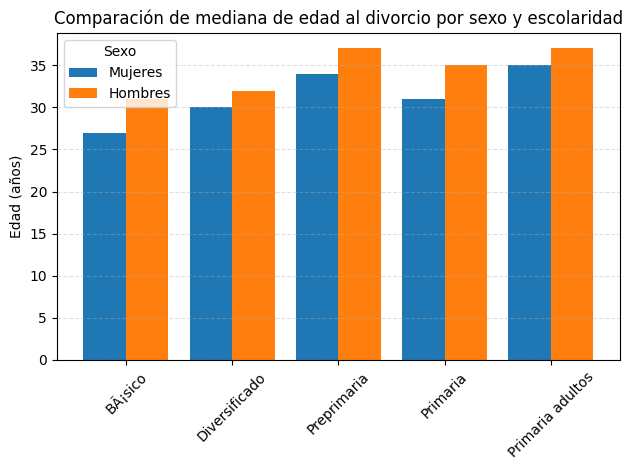

In [17]:
df_med = pd.DataFrame({
    "Mujeres": medianas_muj,
    "Hombres": medianas_hom
})

print(df_med)

plt.figure(figsize=(8,5))

df_med.plot(kind="bar", width=0.8)

plt.title("Comparación de mediana de edad al divorcio por sexo y escolaridad")
plt.ylabel("Edad (años)")
plt.xlabel("")
plt.xticks(rotation=45)
plt.legend(title="Sexo")

plt.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()